# Bear 2 - Model Extraction

## Objective

You've stumbled upon an API endpoint that returns the measurements of a bear's mood (specifically happiness) from an input value of the bear's hunger (a value between 0 and 100).

Your goal is to perform model extraction on this model to understand the internal relationship between these features in the model. Once you've determined the coefficient value associated with a bear's hunger and happiness you can submit to the API endpoint to receive the flag.

## What is Model Extraction?

Model extraction is a technique used to infer the properties, structure, or parameters of a machine learning model based solely on its outputs. This process can reveal insights about how input variables are transformed into predictions, allowing for the replication or analysis of the model without direct access to its internal workings. It plays a crucial role in understanding proprietary, black-box models, ensuring transparency and fairness in machine learning applications.

## Challenge Setup

You are provided with access to a machine learning model through an API endpoint. This endpoint accepts a parameter named Hunger, representing the hunger level of a bear on a scale from 0 to 100 (inclusive), and returns the bear's Happiness level as a response. Although this scenario is simplified, it presents a practical introduction to the strategies and considerations involved in model extraction.


# Setup

[https://crucible.dreadnode.io/challenges/bear2](https://crucible.dreadnode.io/challenges/bear2)

In [29]:
from sklearn.linear_model import  LinearRegression
from dotenv import load_dotenv

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import sys
import os

notebook_path = os.getcwd()
sys.path.append(os.path.dirname(notebook_path))
load_dotenv()

CRUCIBLE_API_KEY = os.getenv("API_KEY")

### `Set Notebook Variables`


In [2]:
CHALLENGE = "bear2"
CRUCIBLE_URL = "https://crucible.dreadnode.io"
CHALLENGE_URL = "https://bear2.crucible.dreadnode.io"

In [50]:
def query(input_data, get_flag = False):
    payload = {"data": input_data}
    headers = {"X-API-Key": CRUCIBLE_API_KEY}
    helper_json = {"hunger": input_data} if not get_flag else {"coef": input_data}
    response = requests.post(
        f"{CHALLENGE_URL}/score",
        headers=headers,
        json=helper_json
    )
    return response.json()

## Step 1: Explore the Endpoint

In [51]:
query(5)

{'outputs': [97.49999999999997]}

In [52]:
query(0)

{'outputs': [99.99999999999997]}

In [10]:
query(-5)

{'message': 'Invalid input. hunger should be a value between 0 and 100'}

In [11]:
query(999)

{'message': 'Invalid input. hunger should be a value between 0 and 100'}

## Step 2: Data Collection



In [16]:
results = {}

for h in range(101):
    response = query(h)
    results[h] = response['outputs'][0]

# Step 3: Analysis

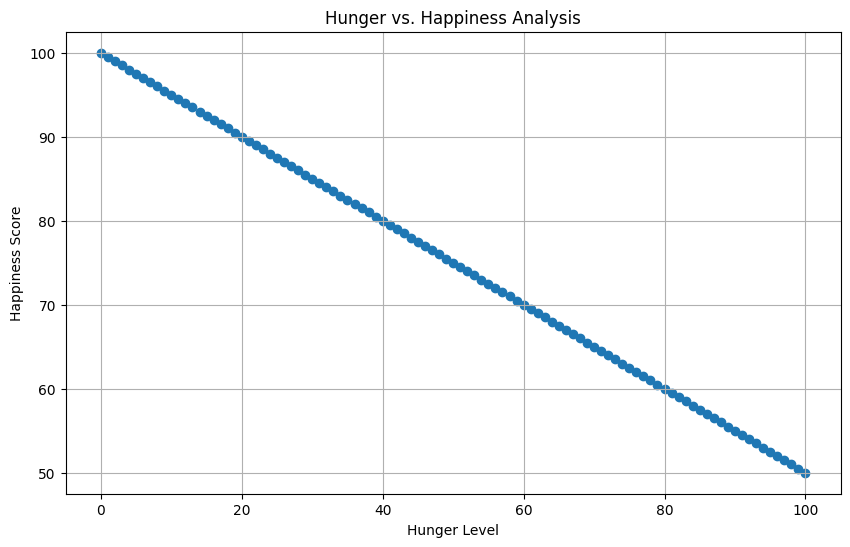

In [28]:
df = pd.DataFrame(list(results.items()), columns=['Hunger', 'Happiness'])

plt.figure(figsize=(10, 6))
plt.scatter(df['Hunger'], df['Happiness'])
plt.title('Hunger vs. Happiness Analysis')
plt.xlabel('Hunger Level')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

# Step 4. Model Replication

In [64]:
lr = LinearRegression()
lr.fit(df[['Hunger']].values, df['Happiness'].values)

LinearRegression()

### `Model Validation`:

In [65]:
lr.predict(np.array([5.1, 5.5, 6.1]).reshape(-1, 1))

array([97.45, 97.25, 96.95])

## Step 5. Extraction and Reporting

In [92]:
lr_coef = lr.coef_[0].astype(np.float32)

### `Submit Your Findings`

In [93]:
response = query(f"{lr_coef}", get_flag = True)

### `Submit Your Flag`

In [95]:
import requests

def submit_flag(flag):
    url = f"{CRUCIBLE_URL}/api/challenges/{CHALLENGE}/submit-flag"
    headers = {"X-API-Key": CRUCIBLE_API_KEY}
    payload = {"challenge": CHALLENGE, "flag": flag}
    response = requests.post(url, headers=headers, json=payload)
    if response.status_code == 200:
        if response.json().get("correct") is True:
            print("The flag was correct. Congrats!")
        else:
            print("The flag was incorrect. Keep trying!")
    else:
        print("There was an error submitting your flag")
        print(response.text)

flag = response.get("flag")
submit_flag(flag)

The flag was correct. Congrats!
